# Importing Required Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Loading the Datasets

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PClub - Spring Camp/ML/SMILING Molecules/SMILING_Molecules - Datasets/original_training_set/original_training_set.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PClub - Spring Camp/ML/SMILING Molecules/SMILING_Molecules - Datasets/new_dataset/new_dataset.csv')

In [ ]:
df1

,id_pair,curated_smiles_molecule_a,curated_smiles_molecule_b,tanimoto_cdk_Extended,TanimotoCombo,frac_similar
0,1,CCN(CC)CC(=O)Nc1c(C)cccc1C,CCCN1CCCC[C@H]1C(=O)Nc1c(C)cccc1C,0.641434,1.623,0.4688
1,2,Cc1nc2n(c(=O)c1CCN1CCC(c3noc4cc(F)ccc34)CC1)CC...,Cc1nc2n(c(=O)c1CCN1CCC(c3noc4cc(F)ccc34)CC1)CCCC2,0.928846,1.812,0.9375
2,3,COc1ccccc1OCC(O)CO,COC(=O)CCc1ccc(OCC(O)CNC(C)C)cc1,0.381119,1.064,0.1406
3,4,CCOc1ccccc1OCCN[C@H](C)Cc1ccc(OC)c(S(N)(=O)=O)c1,CC(C)C(=O)Nc1ccc([N+](=O)[O-])c(C(F)(F)F)c1,0.213429,0.674,0.0313
4,5,C[C@H](N)Cc1ccccc1,CC(C)(N)Cc1ccccc1,0.905660,1.690,0.8828
...,...,...,...,...,...,...
95,96,CCC(=O)O[C@]1(C(=O)CCl)[C@@H](C)C[C@H]2[C@@H]3...,CC(=O)S[C@@H]1CC2=CC(=O)CC[C@]2(C)[C@H]2CC[C@@...,0.483240,1.145,0.3413
96,97,C[C@H](N)[C@H](O)c1ccc(O)c(O)c1,C[C@@H](N)[C@@H](O)c1ccccc1,0.637755,1.430,0.7480
97,98,CCOC(=O)C1(c2ccccc2)CCN(C)CC1,N[C@@H](Cc1ccc(O)cc1)C(=O)O,0.313869,1.057,0.0159
98,99,CC1(C)O[C@@H]2C[C@H]3[C@@H]4C[C@H](F)C5=CC(=O)...,C[C@H]1C[C@H]2[C@@H]3CC[C@](O)(C(=O)CO)[C@@]3(...,0.618243,1.579,0.6772


In [ ]:
df2

,id_pair,curated_smiles_molecule_a,curated_smiles_molecule_b,tanimoto_cdk_Extended,TanimotoCombo,pchembl_distance,target_name,simil_2D,simil_3D,dissimil_2D,dissimil_3D,pair_type,n_answers,n_similar,frac_similar
0,1,Cc1cscc1-c1cccnc1,Cc1ccsc1-c1cccnc1,0.567010,1.989,0.31,CYP2D6,0,1,1,0,"dis2D,sim3D",22,18,0.818182
1,2,O=S(=O)(c1ccccc1)c1ccc(/C=C/c2ccc(F)cc2F)cc1,O=S(=O)(c1ccc(F)cc1)c1ccc(/C=C/c2ccc(F)cc2)nc1,0.532051,1.782,0.34,HERG,0,1,1,0,"dis2D,sim3D",16,9,0.562500
2,3,NCc1ccc(-c2ccccc2)o1,CNCc1ccc(-c2cccnc2)o1,0.549206,1.778,0.49,CYP2D6,0,1,1,0,"dis2D,sim3D",21,8,0.380952
3,4,CCCCCCCN(CC)CC#CCc1ccc(Cl)cc1,CCCCCCCN(CC)CC#Cc1ccc(C)cc1,0.558952,1.764,1.30,HERG,0,1,1,0,"dis2D,sim3D",20,15,0.750000
4,5,CN(C)Cc1ccc(-c2cccnc2)s1,CNCc1ccc(-c2cccnc2)o1,0.452685,1.757,0.50,CYP2D6,0,1,1,0,"dis2D,sim3D",23,15,0.652174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,OCC1CC2(c3ccccc3)NC1CCC2NCc1cc(OC(F)(F)F)ccc1O...,C[C@@H]1CCCN1CCc1ccc2nc(-c3csc(-c4cc(Cl)nc(Cl)...,0.399689,0.741,1.28,HERG,0,0,1,1,"dis2D,dis3D",25,1,0.040000
96,97,Cc1ccc2c(c1C)N1[C@H](CNC[C@H]1C)C2,COc1cc2c(cc1C(F)(F)F)N(C(=O)Nc1cncc(-c3ccc(F)c...,0.400709,0.625,0.03,5HT2B,0,0,1,1,"dis2D,dis3D",18,0,0.000000
97,98,COc1ccc(N2Cc3c(c4cc(Cl)c(Cl)cc4n3C)C2=O)cc1OCC...,O=C1NC2CCNCCN2c2ccccc21,0.405573,0.657,0.47,5HT2B,0,0,1,1,"dis2D,dis3D",24,4,0.166667
98,99,Cc1nc2ccccn2c1-c1ccc2cc(CCN3CCC[C@H]3C)ccc2n1,CN(C)CCCn1nc(C2=C(c3cn(-c4ccc5ccccc5c4)c4ccccc...,0.413889,0.762,1.90,HERG,0,0,1,1,"dis2D,dis3D",16,2,0.125000


# Combining Required features of Both Datasets

In [ ]:
data = pd.concat([df1[['tanimoto_cdk_Extended', 'TanimotoCombo', 'frac_similar']], df2[['tanimoto_cdk_Extended', 'TanimotoCombo', 'frac_similar']]], axis=0)
data

,tanimoto_cdk_Extended,TanimotoCombo,frac_similar
0,0.641434,1.623,0.468800
1,0.928846,1.812,0.937500
2,0.381119,1.064,0.140600
3,0.213429,0.674,0.031300
4,0.905660,1.690,0.882800
...,...,...,...
95,0.399689,0.741,0.040000
96,0.400709,0.625,0.000000
97,0.405573,0.657,0.166667
98,0.413889,0.762,0.125000


### I did this because **https://www.semanticscholar.org/paper/Molecular-Similarity-Perception-Based-on-Models-Gandini-Marcou/9263b79613c97148906a09e7269543481566ce51** this paper mentioned how they trained their model on only these 2 features with good results.

# Normalizing Features

In [ ]:
print('Range of tanimoto_cdk_Extended =', min(data['tanimoto_cdk_Extended']), '-', max(data['tanimoto_cdk_Extended']))
print('Range of TanimotoCombo =', min(data['TanimotoCombo']), '-', max(data['TanimotoCombo']))

Range of tanimoto_cdk_Extended = 0.105405405405405 - 1.0
Range of TanimotoCombo = 0.443 - 2.0


### As range is fairly small, I can use min-max scaling

In [ ]:
data['tanimoto_cdk_Extended'] = (data['tanimoto_cdk_Extended']-min(data['tanimoto_cdk_Extended']))/max(data['tanimoto_cdk_Extended'])
data['TanimotoCombo'] = (data['TanimotoCombo']-min(data['TanimotoCombo']))/max(data['TanimotoCombo'])
data

,tanimoto_cdk_Extended,TanimotoCombo,frac_similar
0,0.536029,0.5900,0.468800
1,0.823441,0.6845,0.937500
2,0.275713,0.3105,0.140600
3,0.108024,0.1155,0.031300
4,0.800255,0.6235,0.882800
...,...,...,...
95,0.294284,0.1490,0.040000
96,0.295304,0.0910,0.000000
97,0.300167,0.1070,0.166667
98,0.308483,0.1595,0.125000


# Checking Relationship of the 2 Features with the Similarity Probability

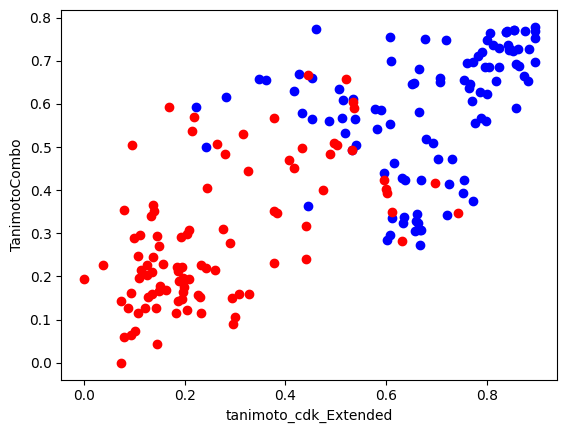

In [ ]:
plt.scatter(data[data['frac_similar']>=0.5]['tanimoto_cdk_Extended'], data[data['frac_similar']>=0.5]['TanimotoCombo'], color='b')
plt.scatter(data[data['frac_similar']<0.5]['tanimoto_cdk_Extended'], data[data['frac_similar']<0.5]['TanimotoCombo'], color='r') # Using 0.5 as threshold for similarity
plt.xlabel('tanimoto_cdk_Extended')
plt.ylabel('TanimotoCombo')
plt.show()

### The scatter plot shows that the data is almost linearly separable with few overlaps. Thus an SVM (Support Vector Machine) Model should produce good results. I will use RBF kernel to handle potential non-linearities.

# Training SVM Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[['tanimoto_cdk_Extended', 'TanimotoCombo']], np.where(data['frac_similar']>=0.5, 1, 0), test_size=0.2, random_state=42)

In [ ]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svm.predict(X_test)

# Converting the y_test into Similar/Dissimilar Labels

In [ ]:
y_test = np.where(y_test >= 0.5, 1, 0)

# Finding Final Accuracy

In [ ]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print()
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Accuracy: 0.9

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        16
           1       0.86      1.00      0.92        24

    accuracy                           0.90        40
   macro avg       0.93      0.88      0.89        40
weighted avg       0.91      0.90      0.90        40

